### Question 3:
Who is happier with their job? software engineer or data scientist or data analyst?

In [3]:
# setup
import pandas as pd
import numpy as np
import clean_data as c
import os
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
# load data
data = pd.read_pickle('data')
print(data.columns)

Index(['Respondent', 'is_DS_ML', 'is_DA', 'is_DEV', 'is_full_time',
       'is_student', 'edlevel', 'major', 'salary', 'salary_freq', 'country',
       'salary_annual', 'company_size', 'JobSat', 'year'],
      dtype='object')


Saving figure Job_satisfication_2018


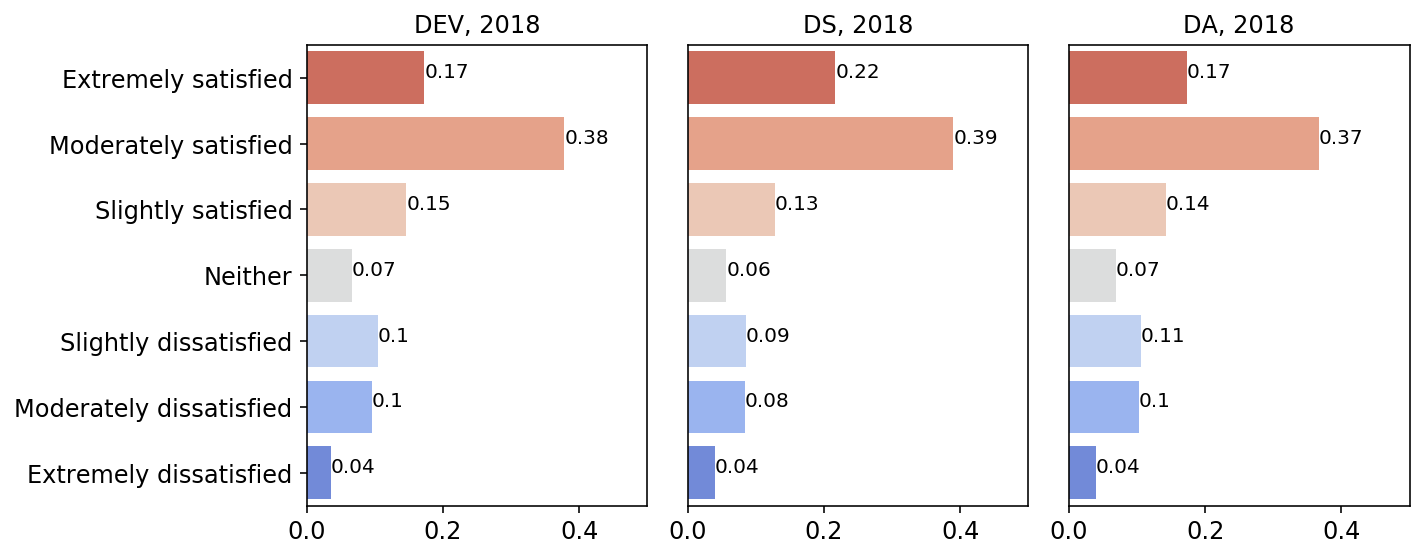

Saving figure Job_satisfication_2019


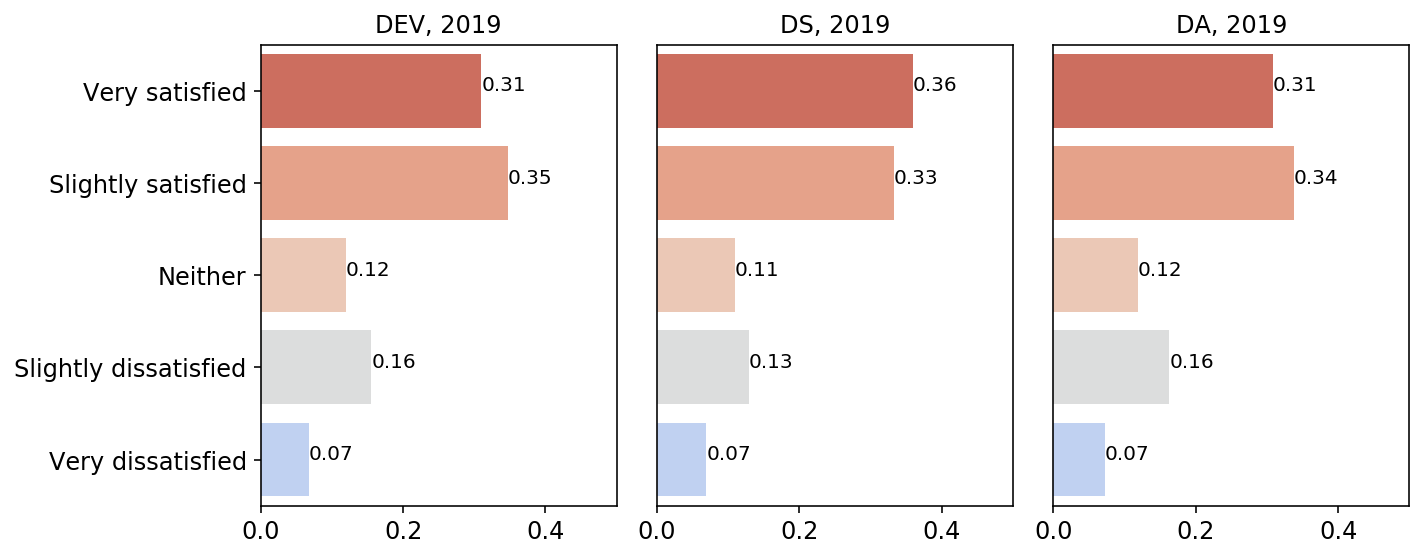

In [22]:
def plot_satisfication(data, year, title, i, order):
    """
    plot the proportion of users in each satistication category
    """
    data = data[(data['year'] == year) & (data['is_full_time'] == True)]
    props = (data['JobSat'].value_counts(normalize=True).reset_index().
         rename(columns={'index': 'category','JobSat': 'percent'}))
    sns.barplot(x = 'percent', y = 'category', data=props, ax=ax[i],
            palette = sns.color_palette("coolwarm_r", 7),
            order=order)
    c.add_number(ax[i], props, order)   
    ax[i].set(xlabel='',
            title=title,
            ylabel='',
            xlim = (0, 0.5))
    if i > 0: ax[i].set(yticks=[])

        
        
# developer
data_dev = data[(data['is_DEV'] == True)] 
# Data scientist
data_ds = data[(data['is_DS_ML'] == True)]
# Data Analyst
data_da = data[(data['is_DA'] == True)]



# Plot 2018's 'Job Satisfication'
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# order of the ylabel
order=['Extremely satisfied','Moderately satisfied',
                    'Slightly satisfied', 'Neither', 'Slightly dissatisfied',
                    'Moderately dissatisfied','Extremely dissatisfied']

plot_satisfication(data_dev, 2018, 'DEV, 2018', 0, order)
plot_satisfication(data_ds, 2018, 'DS, 2018', 1, order)
plot_satisfication(data_da, 2018, 'DA, 2018', 2, order)

save_fig('Job_satisfication_2018')

plt.show()


# plot 2019's 'Job Satisfication'
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

order=['Very satisfied', 'Slightly satisfied', 'Neither', 
                    'Slightly dissatisfied', 'Very dissatisfied']

plot_satisfication(data_dev, 2019, 'DEV, 2019', 0, order)
plot_satisfication(data_ds, 2019, 'DS, 2019', 1, order)
plot_satisfication(data_da, 2019, 'DA, 2019', 2, order)

save_fig('Job_satisfication_2019')
plt.show()

In [25]:
# let's combine 2018 and 2019 data and 
# divide JobSat into three categories
data['JobSat1'] = 'not_satisfied'
imask = ((data['JobSat'] == 'Very satisfied')| (data['JobSat'] == 'Slightly satisfied')
         |(data['JobSat'] == 'Extremely satisfied') | (data['JobSat'] == 'Moderately satisfied'))
data.loc[imask,'JobSat1']='satisfied'
data.loc[data['JobSat'] == 'Neither', 'JobSat1'] = 'neither'

data1 = data[data.is_full_time].copy()
data1['professional'] = 'DEV'
data1.loc[data1.is_DA, 'professional'] = 'DA'
data1.loc[data1.is_DS_ML, 'professional'] = 'DS'
print(data1.groupby(['professional'])['JobSat1']
      .value_counts(normalize=True).unstack())

Saving figure Job_satisfication


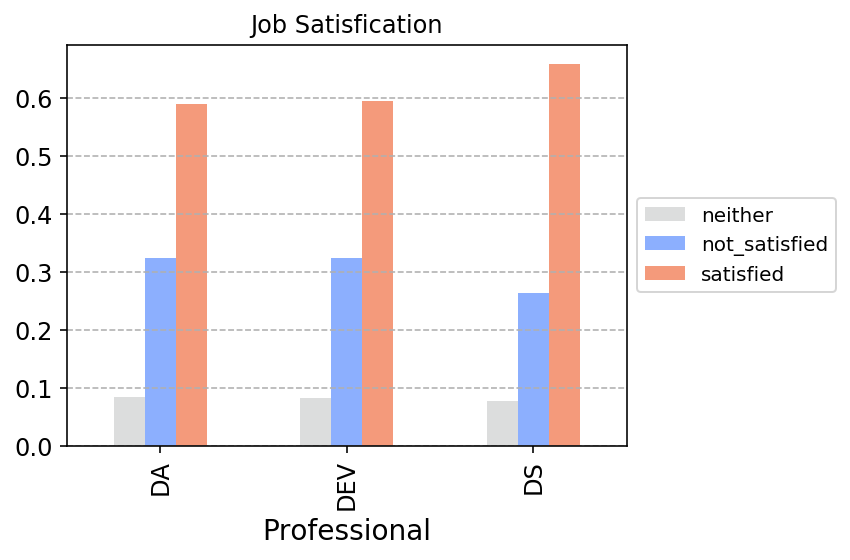

In [26]:
# plot the combined datasets with 3 categories
color = np.array(sns.color_palette("coolwarm_r", 3))[[1,2,0]]
fig,ax=plt.subplots()
(data1.groupby(['professional'])['JobSat1']
 .value_counts(normalize=True)
 .unstack().plot(kind='bar', ax=ax,color=color), '\n')
ax.grid(True, axis='y', linestyle='--')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Professional')
ax.set_title('Job Satisfication')
save_fig('Job_satisfication')